In [13]:
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].isupper() 

In [2]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))

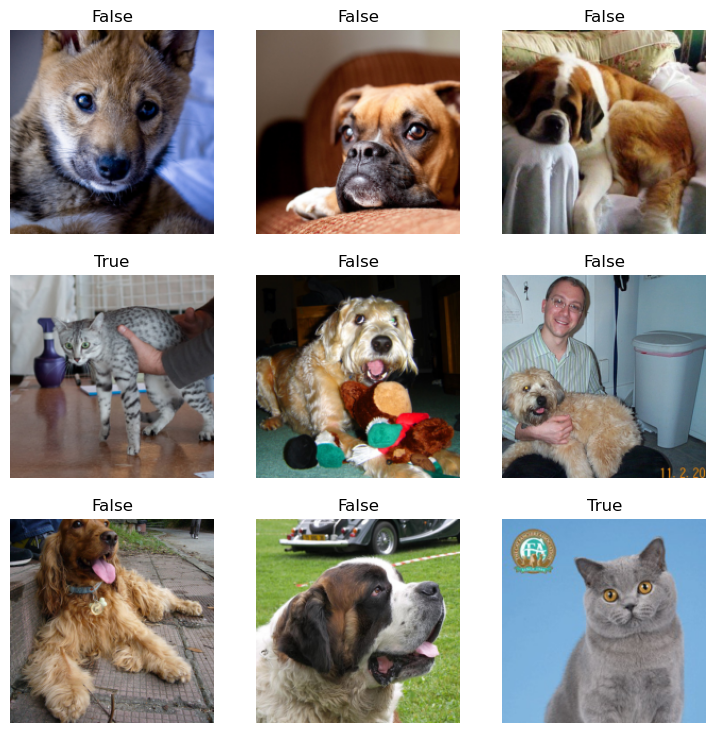

In [ ]:
dls.show_batch()

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

In [ ]:
learn.export('model.pkl')

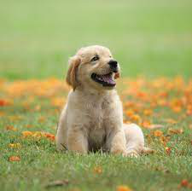

In [5]:
im = PILImage.create('dog.jpeg')
im.thumbnail((192, 192))
im

In [6]:
#export
learn = load_learner('model.pkl')

In [7]:
learn.predict(im)

[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


('False', tensor(0), tensor([9.9999e-01, 7.1776e-06]))

In [8]:
categories = ('Dog', 'Cat')

def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [9]:
classify_image(im)

{'Dog': 0.999992847442627, 'Cat': 7.177590759965824e-06}

In [14]:
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
examples = ['dog.jpeg', 'cat.jpeg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

/Users/arjan1/anaconda3/envs/main/lib/python3.10/site-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/Users/arjan1/anaconda3/envs/main/lib/python3.10/site-packages/gradio/inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/Users/arjan1/anaconda3/envs/main/lib/python3.10/site-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/Users/arjan1/anaconda3/envs/main/lib/python3.10/site-packages/gradio/outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
